# (Collect Data), Visualize and Explore
* Well, the collection has already been done for us and this dataset is included with `sklearn`
* In reality, many datasets will need to go through a preprocessing and exploratory data analysis step.  `sklearn` has many tools for this.

<img src='imgs/ml_process_by_micheleenharris.png' alt="Smiley face" width="400"><br>

## The Dataset - Fisher's Irises

Most machine learning algorithms implemented in scikit-learn expect data to be stored in a
**two-dimensional array or matrix**.  The arrays can be
either ``numpy`` arrays, or in some cases ``scipy.sparse`` matrices.
The size of the array is expected to be `n_samples x n_features`.

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases.<br><br>
<font color = "lightgrey">
The number of features must be fixed in advance. However it can be very high dimensional
(e.g. millions of features) with most of them being zeros for a given sample. This is a case
where `scipy.sparse` matrices can be useful, in that they are
much more memory-efficient than numpy arrays.
</font><br><br>
If there are labels or targets, they need to be stored in **one-dimensional arrays or lists**.

Today we are going to use the <b>`iris`</b> dataset which comes with `sklearn`.  It's fairly small as we'll see shortly.

> <b>Remember our ML TIP:  Ask sharp questions.</b><br><br>e.g. What type of flower is this (pictured below) closest to of the three given classes?

<img border="0" alt="iris species" src="imgs/iris-setosa.jpg" width="200">
<p align="right">from http://www.madlantern.com/photography/wild-iris</p>

### Labels (species names/classes):
<img border="0" alt="iris species" src="imgs/irises.png" width="500" height="500">

<font color = "lightgrey"> TIP: Commonly, machine learning algorithms will require your data to be standardized, normalized or even reguarlized and preprocessed.  In `sklearn` the data must also take on a certain structure.</font>


In [ ]:
# Imports for python 2/3 compatibility

from __future__ import absolute_import, division, print_function, unicode_literals

# For python 2, comment these out:
# from builtins import range

QUICK QUESTION:
1.  What do you expect this data set to be if you are trying to recognize an iris species?
* For our `[n_samples x n_features]` data array, what do you think
    * the samples are?
    * the features are?

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()

print(type(iris.data))
print(type(iris.target))

## Let's Dive In!

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Features (aka columns in data)

In [ ]:
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()

# converting to dataframe for clearer printing
pd.DataFrame({'feature name': iris.feature_names})

#### Targets (aka labels)

In [ ]:
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()

# converting to dataframe for clearer printing
pd.DataFrame({'target name': iris.target_names})

> `sklearn` TIP: all included datasets for have at least `feature_names` and sometimes `target_names`

### Get to know the data - explore
* Features (columns/measurements) come from this diagram
<img border="0" alt="iris data features" src="imgs/iris_petal_sepal.png" width="200" height="200">
* Shape
* Peek at data
* Summaries

<b>Shape and representation<b>

In [ ]:
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()

# How many data points (rows) x how many features (columns)
print(iris.data.shape)
print(iris.target.shape)

<b>Sneak a peek at data (and a reminder of your `pandas` dataframe methods)<b>

In [ ]:
# convert to pandas df (adding real column names) to use some pandas functions (head, describe...)
iris.df = pd.DataFrame(iris.data, 
                       columns = iris.feature_names)


# first few rows
iris.df.head()

<b>Describe the dataset with some summary statitsics<b>

In [ ]:
# summary stats
iris.df.describe()

* We don't have to do much with the `iris` dataset.  It has no missing values.  It's already in numpy arrays and has the correct shape for `sklearn`.  However we could try <b>standardization</b> and/or <b>normalization</b>. (later, in the transforms section, we will show one hot encoding, a preprocessing step)

## Visualize
* There are many ways to visualize and here's a boxplot:

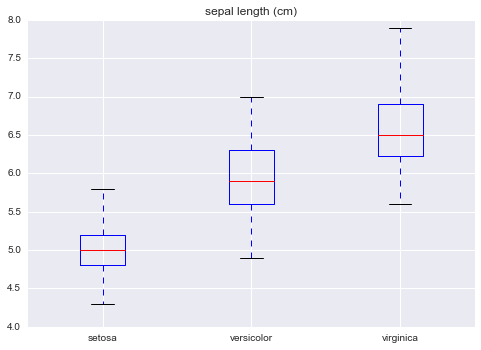

In [11]:
import matplotlib.pyplot as plt

import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()

iris.df = pd.DataFrame(iris.data, 
                       columns = iris.feature_names)

iris.df['target'] = iris.target

df = iris.df.loc[:, ['sepal length (cm)', 'target']]

df['idx'] = list(range(0, 50))*3
df = df.pivot(index = 'idx', columns = 'target')
df = np.array(df)
plt.boxplot(df, labels = iris.target_names)
plt.title('sepal length (cm)')

**Using `pairplot` from `seaborn` is a quick way to see which features separate out our data ()**

In [ ]:
import seaborn as sb
sb.pairplot(pd.DataFrame(iris.data, columns = iris.feature_names))

### Preprocessing (Bonus Material)

<p>What you might have to do before using a learner in `sklearn`:</p>
1. Non-numerics transformed to numeric (tip: use applymap() method from `pandas`)
* Fill in missing values
* Standardization
* Normalization
* Encoding categorical features (e.g. one-hot encoding or dummy variables)

<b>Features should end up in a numpy.ndarray (hence numeric) and labels in a list.</b>

Data options:
* Use pre-processed [datasets](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets) from scikit-learn
* [Create your own](http://scikit-learn.org/stable/datasets/index.html#sample-generators)
* Read from a file

If you use your own data or "real-world" data you will likely have to do some data wrangling and need to leverage `pandas` for some data manipulation.

#### Standardization - make our data look like a standard Gaussian distribution (commonly needed for `sklearn` learners)

> FYI: you'll commonly see the data or feature set (ML word for data without it's labels) represented as a capital <b>X</b> and the targets or labels (if we have them) represented as a lowercase <b>y</b>.  This is because the data is a 2D array or list of lists and the targets are a 1D array or simple list.

In [ ]:
# Standardization aka scaling
from sklearn import preprocessing, datasets

# make sure we have iris loaded
iris = datasets.load_iris()

X, y = iris.data, iris.target

# scale it to a gaussian distribution
X_scaled = preprocessing.scale(X)

# how does it look now
pd.DataFrame(X_scaled).head()

In [ ]:
# let's just confirm our standardization worked (mean is 0 w/ unit variance)
pd.DataFrame(X_scaled).describe()

# also could:
#print(X_scaled.mean(axis = 0))
#print(X_scaled.std(axis = 0))

> PRO TIP: To save our standardization and reapply later (say to the test set or some new data), create a transformer object like so:
```python
scaler = preprocessing.StandardScaler().fit(X_train)
# apply to a new dataset (e.g. test set):
scaler.transform(X_test)
```

#### Normalization - scaling samples <i>individually</i> to have unit norm
* This type of scaling is really important if doing some downstream transformations and learning (see sklearn docs [here](http://scikit-learn.org/stable/modules/preprocessing.html#normalization) for more) where similarity of pairs of samples is examined
* A basic intro to normalization and the unit vector can be found [here](http://freetext.org/Introduction_to_Linear_Algebra/Basic_Vector_Operations/Normalization/)

In [ ]:
# Standardization aka scaling
from sklearn import preprocessing, datasets

# make sure we have iris loaded
iris = datasets.load_iris()

X, y = iris.data, iris.target

# scale it to a gaussian distribution
X_norm = preprocessing.normalize(X, norm='l1')

# how does it look now
pd.DataFrame(X_norm).tail()

In [ ]:
# let's just confirm our standardization worked (mean is 0 w/ unit variance)
pd.DataFrame(X_norm).describe()

# cumulative sum of normalized and original data:
#print(pd.DataFrame(X_norm.cumsum().reshape(X.shape)).tail())
#print(pd.DataFrame(X).cumsum().tail())

# unit norm (convert to unit vectors) - all row sums should be 1 now
X_norm.sum(axis = 1)

> PRO TIP: To save our normalization (like standardization above) and reapply later (say to the test set or some new data), create a transformer object like so:
```python
normalizer = preprocessing.Normalizer().fit(X_train)
# apply to a new dataset (e.g. test set):
normalizer.transform(X_test) 
```

Created by a Microsoft Employee.
	
The MIT License (MIT)<br>
Copyright (c) 2016 Micheleen Harris